#  Visualización y análisis de datos médicos

En este proyecto se visualizan y analizan datos de exámenes médicos utilizando **pandas**, **NumPy**, **matplotlib** y **seaborn**. Los valores del conjunto de datos fueron recopilados durante exámenes médicos de rutina.

---

##  Archivo de datos

**Nombre del archivo:** `medical_examination.csv`  
Cada fila representa un paciente. Las columnas contienen medidas corporales, resultados de análisis de sangre y hábitos de vida.

| Característica                          | Tipo de variable         | Variable       | Tipo de valor                          |
|----------------------------------------|---------------------------|----------------|----------------------------------------|
| Edad                                   | Objetiva                  | `age`          | Entero (días)                          |
| Altura                                 | Objetiva                  | `height`       | Entero (cm)                            |
| Peso                                   | Objetiva                  | `weight`       | Flotante (kg)                          |
| Género                                 | Objetiva                  | `gender`       | Código categórico                      |
| Presión arterial sistólica             | Función de examen         | `ap_hi`        | Entero                                 |
| Presión arterial diastólica            | Función de examen         | `ap_lo`        | Entero                                 |
| Colesterol                             | Función de examen         | `cholesterol`  | 1: normal, 2: alto, 3: muy alto        |
| Glucosa                                | Función de examen         | `gluc`         | 1: normal, 2: alto, 3: muy alto        |
| Fumador                                 | Subjetiva                 | `smoke`        | Binario                                |
| Consumo de alcohol                     | Subjetiva                 | `alco`         | Binario                                |
| Actividad física                       | Subjetiva                 | `active`       | Binario                                |
| Enfermedad cardiovascular              | Variable objetivo         | `cardio`       | Binario                                |

---

## 📊 Objetivos del proyecto

Este proyecto tiene como propósito aplicar y consolidar conocimientos adquiridos en el curso [Python para Data Science – Udemy](https://www.udemy.com/course/python-para-data-science/) y en el proyecto [Medical Data Visualizer – FreeCodeCamp](https://www.freecodecamp.org/espanol/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer), utilizando un conjunto de datos clínicos reales.

Los objetivos específicos son:

1. **Practicar el uso de librerías clave** para análisis de datos: `pandas`, `NumPy`, `matplotlib` y `seaborn`.
2. **Aplicar funciones modulares en Python** para cargar, transformar y visualizar datos clínicos.
3. **Explorar y limpiar el dataset** para preparar variables relevantes como edad, IMC, colesterol y glucosa.
4. **Visualizar relaciones clínicas** mediante gráficos de línea, barras, histogramas, tortas y dispersión.
5. **Comparar grupos con y sin enfermedad cardiovascular** en función de variables como edad, IMC y presión arterial.
6. **Estandarizar el estilo gráfico** para presentaciones profesionales y facilitar la interpretación institucional.
7. **Preparar el entorno para futuros modelos de machine learning**, normalizando variables y entendiendo cor.

fesional.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df


In [3]:
# Mostrar exploración inicial
def explorar(df):
    print("\nForma:", df.shape)
    print("\nPrimeras filas:\n", df.head())
    print("\nInfo:\n", df.info())
    print("\nNulos:\n", df.isnull().sum())

In [4]:
# Función de estilo general
def estilo_grafico(titulo, xlabel, ylabel):
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()

In [5]:
# Línea de presión sistólica por rangos de edad
def presion_por_rangos(df):
    df["age_group"] = pd.cut(df["age_years"], bins=[30, 40, 50, 60, 70], labels=["30–40", "40–50", "50–60", "60–70"])
    df.groupby("age_group", observed=True)["ap_hi"].mean().plot(kind="line", marker="o", color="orange")
    estilo_grafico("Presión sistólica promedio por rangos de edad", "Grupo etario", "Presión sistólica (mmHg)")
    plt.show()
    plt.close()

# Comparar presión entre grupos con y sin enfermedad
def comparar_por_cardio(df):
    df.groupby(["age_years", "cardio"])["ap_hi"].mean().unstack().plot()
    estilo_grafico("Presión sistólica por edad y grupo cardiovascular", "Edad (años)", "Presión sistólica (mmHg)")
    plt.show()
    plt.close()

# Línea general de presión por edad
def presion_general(df):
    df.groupby("age_years")["ap_hi"].mean().plot(color="blue", linewidth=2)
    estilo_grafico("Promedio de presión sistólica por edad", "Edad (años)", "Presión sistólica (mmHg)")
    plt.show()
    plt.close()

In [6]:
# Gráfico de barras de cantidad de pacientes por edad
def barras_por_edad(df):
    df["age_years"].value_counts().sort_index().plot(kind="bar", color="lightblue")
    estilo_grafico("Cantidad de pacientes por edad", "Edad (años)", "Cantidad")
    plt.show()
    plt.close()

In [7]:
# Histograma de edad en años, visualiza la distribución de edades
def histograma_edad(df):
    plt.hist(df["age_years"], bins=20, color="skyblue", edgecolor="black")
    estilo_grafico("Distribución de edad", "Edad (años)", "Cantidad de pacientes")
    plt.show()
    plt.close()

# Histograma de IMC
def histograma_imc_filtrado(df):
    df_filtrado = df[(df["BMI"] >= 10) & (df["BMI"] <= 50)]
    plt.hist(df_filtrado["BMI"], bins=20, color="mediumseagreen", edgecolor="black")
    estilo_grafico("Distribución de IMC (filtrada)", "IMC", "Cantidad de pacientes")
    plt.show()
    plt.close()

# Histograma IMC por grupo cardiovascular
def histograma_imc_por_cardio(df):
    df_filtrado = df[(df["BMI"] >= 10) & (df["BMI"] <= 50)]

    grupo_0 = df_filtrado[df_filtrado["cardio"] == 0]["BMI"]
    grupo_1 = df_filtrado[df_filtrado["cardio"] == 1]["BMI"]

    plt.hist([grupo_0, grupo_1], bins=20, label=["Sin enfermedad", "Con enfermedad"],
             color=["lightgreen", "tomato"], edgecolor="black", alpha=0.7)
    estilo_grafico("IMC por grupo cardiovascular", "IMC", "Cantidad de pacientes")
    plt.legend()
    plt.show()
    plt.close()


# Histograma de edad por grupo cardiovascular, compara la edad entre pacientes con y sin enfermedad
def histograma_edad_por_cardio(df):
    plt.hist([df[df["cardio"] == 0]["age_years"], df[df["cardio"] == 1]["age_years"]],
             bins=20, label=["Sin enfermedad", "Con enfermedad"], color=["lightgreen", "tomato"], edgecolor="black")
    estilo_grafico("Distribución de edad por grupo cardiovascular", "Edad (años)", "Cantidad de pacientes")
    plt.legend()
    plt.show()
    plt.close()

In [21]:
# Scatter visualiza cómo varía el IMC con la edad
def scatter_imc_vs_edad_por_cardio(df):
    colores = df["cardio"].map({0: "lightgreen", 1: "tomato"})
    plt.scatter(df["age_years"], df["BMI"], c=colores, alpha=0.5)
    estilo_grafico("IMC en función de la edad (por grupo cardiovascular)", "Edad (años)", "IMC")
    plt.legend(["Sin enfermedad", "Con enfermedad"])
    plt.show()
    plt.close()


In [9]:
# Función única para gráficos de torta
def pie_chart(df, columna, etiquetas, titulo, colores=None):
    """
    Genera un gráfico de torta para una variable categórica o binaria.

    Parámetros:
    - df: DataFrame
    - columna: nombre de la columna a graficar
    - etiquetas: lista de etiquetas para los valores
    - titulo: título del gráfico
    - colores: lista opcional de colores
    """
    valores = df[columna].value_counts()
    plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", colors=colores, startangle=90)
    plt.title(titulo)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    plt.close()

In [10]:
# Subplots 4 histogramas en una figura
# Distribución de edad, Distribución de IMC, Edad por grupo cardiovascular,  IMC por grupo cardiovascular
def subplots_histogramas(df):
    df_filtrado = df[(df["BMI"] >= 10) & (df["BMI"] <= 50)]

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Distribuciones clínicas", fontsize=16)

    # Histograma de edad
    axs[0, 0].hist(df["age_years"], bins=20, color="skyblue", edgecolor="black")
    axs[0, 0].set_title("Edad")
    axs[0, 0].set_xlabel("Años")
    axs[0, 0].set_ylabel("Cantidad")

    # Histograma de IMC
    axs[0, 1].hist(df_filtrado["BMI"], bins=20, color="mediumseagreen", edgecolor="black")
    axs[0, 1].set_title("IMC (filtrado)")
    axs[0, 1].set_xlabel("IMC")
    axs[0, 1].set_ylabel("Cantidad")

    # Edad por grupo cardiovascular
    axs[1, 0].hist([df[df["cardio"] == 0]["age_years"], df[df["cardio"] == 1]["age_years"]],
                  bins=20, label=["Sin enfermedad", "Con enfermedad"],
                  color=["lightgreen", "tomato"], edgecolor="black", alpha=0.7)
    axs[1, 0].set_title("Edad por grupo cardiovascular")
    axs[1, 0].set_xlabel("Edad (años)")
    axs[1, 0].set_ylabel("Cantidad")
    axs[1, 0].legend()

    # IMC por grupo cardiovascular
    axs[1, 1].hist([df_filtrado[df_filtrado["cardio"] == 0]["BMI"],
                    df_filtrado[df_filtrado["cardio"] == 1]["BMI"]],
                   bins=20, label=["Sin enfermedad", "Con enfermedad"],
                   color=["lightgreen", "tomato"], edgecolor="black", alpha=0.7)
    axs[1, 1].set_title("IMC por grupo cardiovascular")
    axs[1, 1].set_xlabel("IMC")
    axs[1, 1].set_ylabel("Cantidad")
    axs[1, 1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    plt.close()

In [11]:
#  Carga y transformación
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)

In [12]:
# Exploración inicial
explorar(df)


Forma: (70000, 16)

Primeras filas:
    id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   

   alco  active  cardio  age_years        BMI  overweight  
0     0       1       0         50  21.967120           0  
1     0       1       1         55  34.927679           1  
2     0       0       1         51  23.507805           0  
3     0       1       1         48  28.710479           1  
4     0       0       0         47  23.011177           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Cou

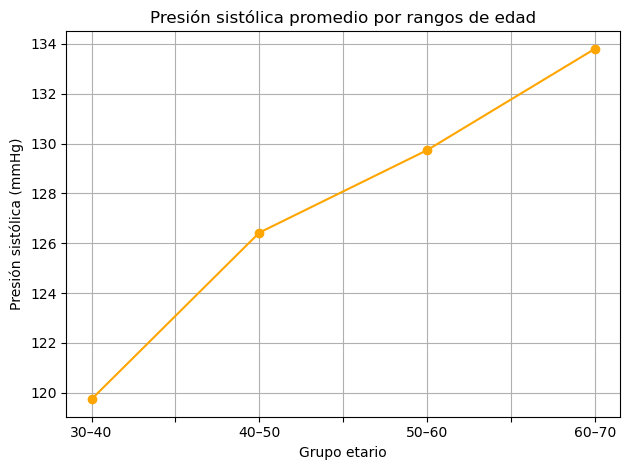

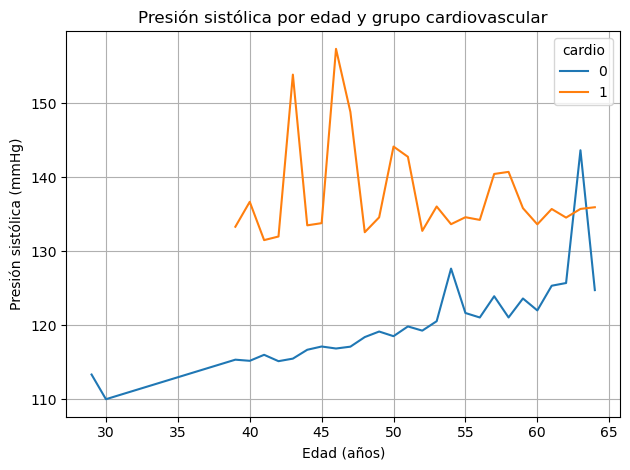

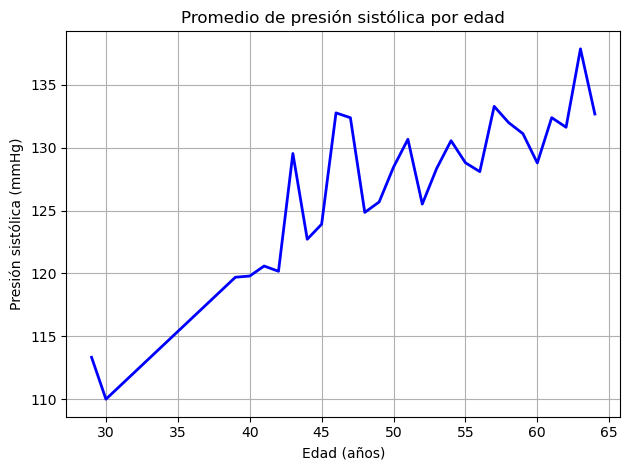

In [13]:
# Gráficos de líneas
presion_por_rangos(df)
comparar_por_cardio(df)
presion_general(df)

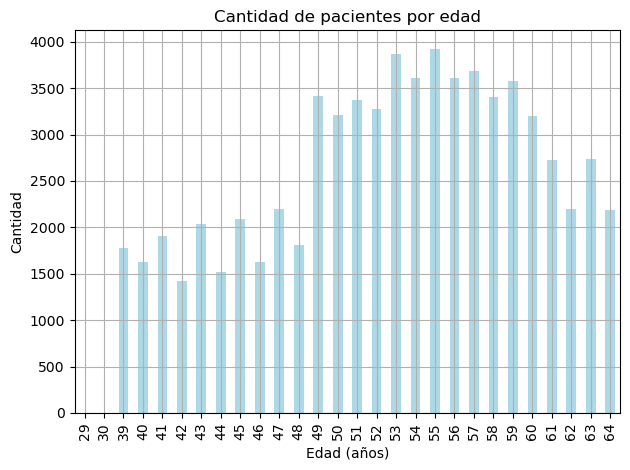

In [14]:
# Gráficos de barras
barras_por_edad(df)

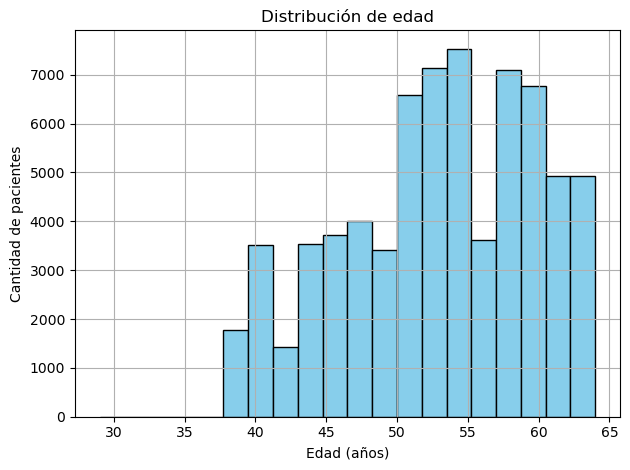

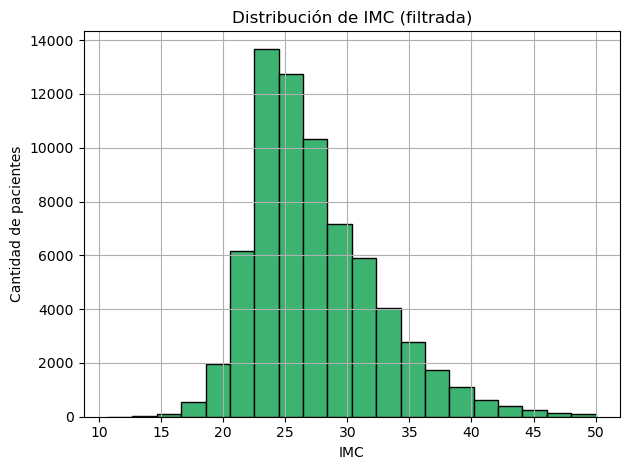

In [15]:
# Histogramas simples
histograma_edad(df)
histograma_imc_filtrado(df)

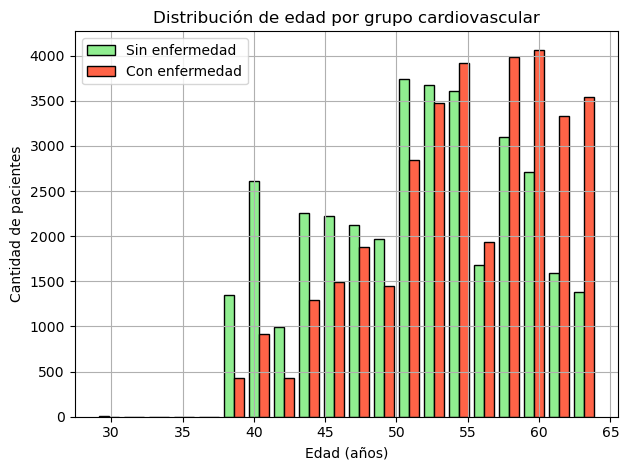

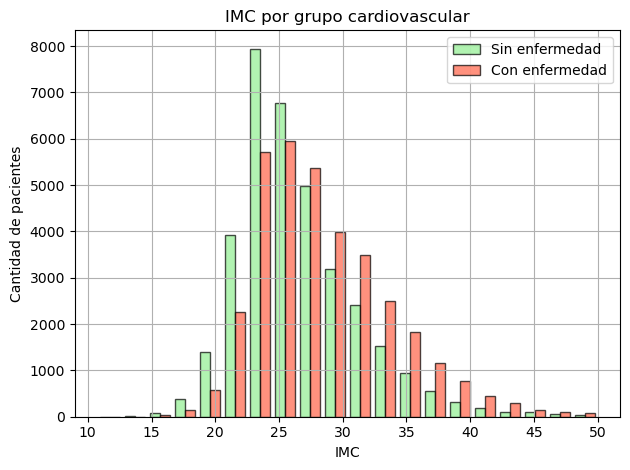

In [16]:
#Histogramas comparativos por grupo
histograma_edad_por_cardio(df)
histograma_imc_por_cardio(df)

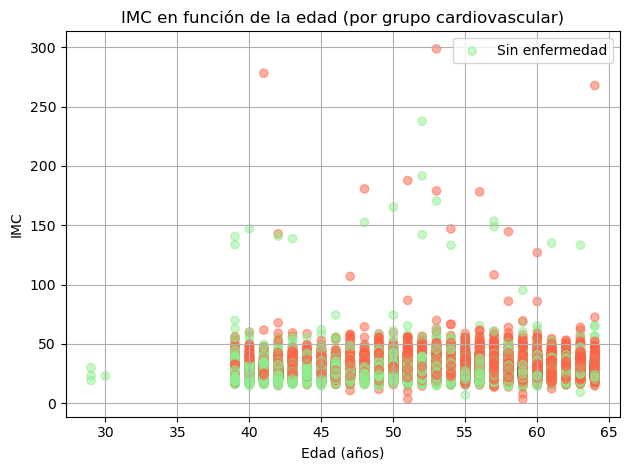

In [22]:
# Scatter
scatter_imc_vs_edad_por_cardio(df)

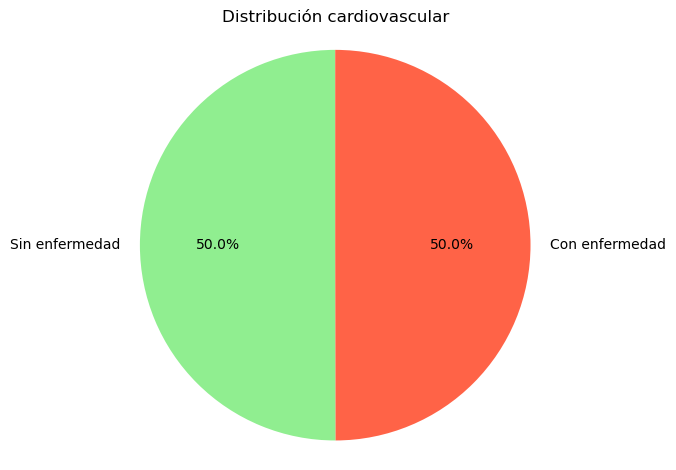

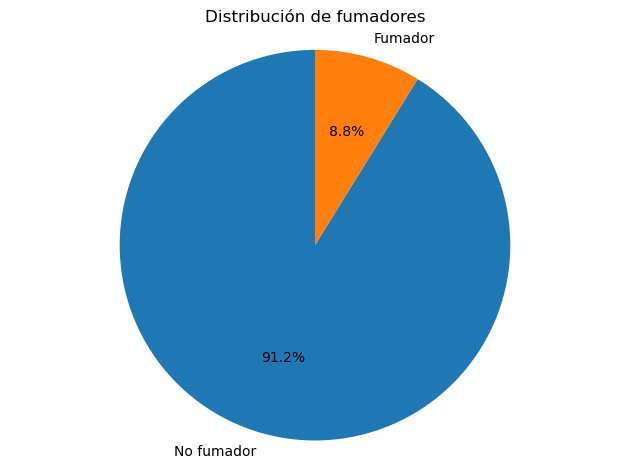

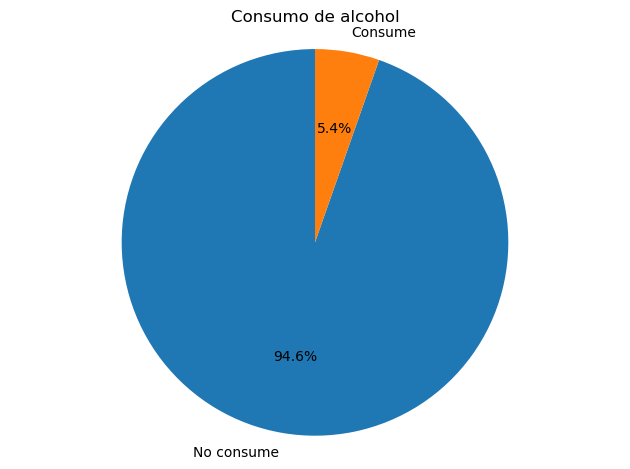

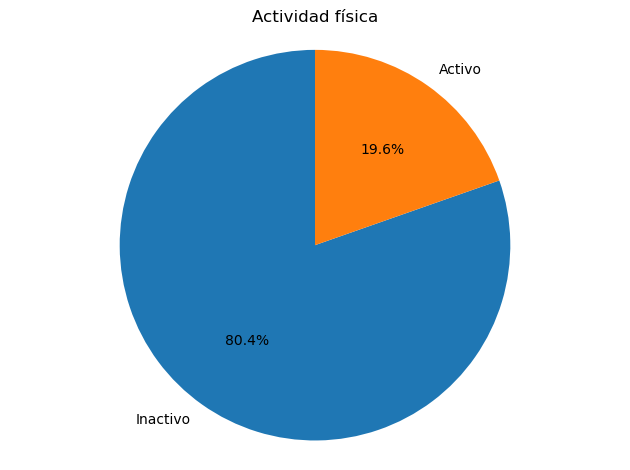

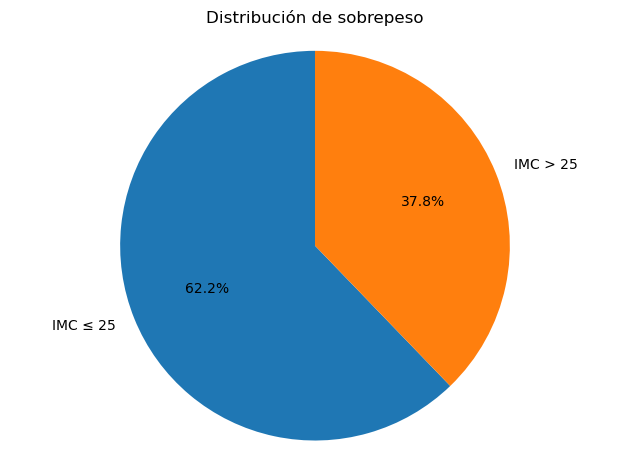

In [18]:
# Gráficos de torta
pie_chart(df, "cardio", ["Sin enfermedad", "Con enfermedad"], "Distribución cardiovascular", ["lightgreen", "tomato"])
pie_chart(df, "smoke", ["No fumador", "Fumador"], "Distribución de fumadores")
pie_chart(df, "alco", ["No consume", "Consume"], "Consumo de alcohol")
pie_chart(df, "active", ["Inactivo", "Activo"], "Actividad física")
pie_chart(df, "overweight", ["IMC ≤ 25", "IMC > 25"], "Distribución de sobrepeso")

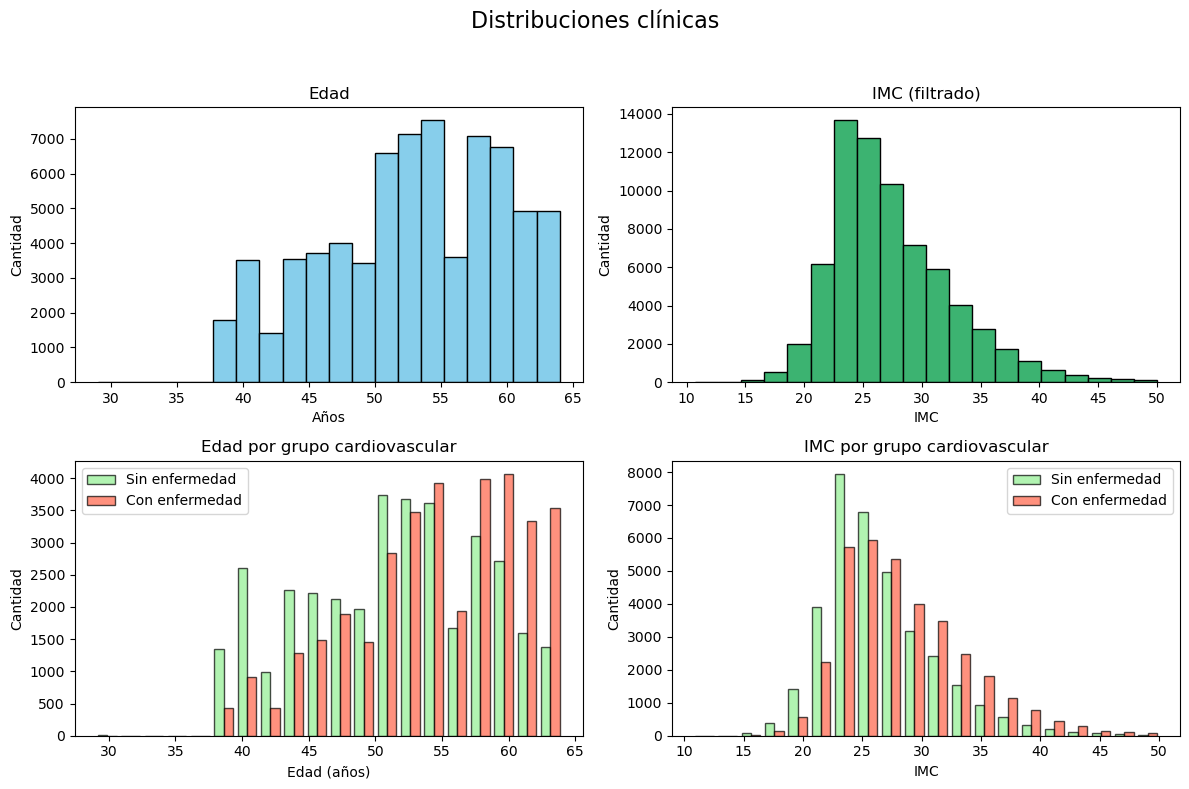

In [19]:
# Subplots
subplots_histogramas(df)

In [1]:
import sys
print(sys.executable)

c:\Users\trezz\Desktop\proyectosDeDesarrolloWeb\MedicalExamination\.venv\Scripts\python.exe
